# Dynamic Programming (DP)

## Interval Scheduling
Given $n$ intervals, find a list of the most number of disjoint intervals.

In [87]:
import math
import pylab
%matplotlib inline
import numpy as np
import networkx as nx

In [88]:
def draw_with_weights(g, weightcol='weight', scale=1, pos=None): 
    edgelist = [(u,v, d[weightcol]) for (u, v, d) in g.edges(data=True)] 
    if pos is None:
        pos = nx.spring_layout(g) # positions for all nodes 
        
    nx.draw_networkx_nodes(g, pos, node_size=700)
    nx.draw_networkx_edges(g, pos, edgelist=[(u,v) for (u, v, w) in edgelist],
                        width=[w * scale + 0.1 for (u, v, w) in edgelist], arrows=True)
    nx.draw_networkx_labels(g, pos, font_size=20, font_family='sans-serif')
    pylab.axis('off')

In [89]:
def longest_path(g):
    all_nodes = list(g.nodes())
    all_nodes.remove('s')
    all_nodes.remove('t')
    ordered_nodes = ['s'] + sorted(all_nodes) + ['t']
    
    distance = {}
    back = {}
    
    for node in ordered_nodes:
        distance[node] = 0
        back[node] = ['s', 't']
    
    all_edges = g.edges(data=True)        
    for node in all_nodes:
        # G.successors()
        valid_edges = [edge for edge in all_edges if edge[1] == node]
        
        for e in valid_edges:
            dis = e[2]['weight'] + distance[e[0]]
            if dis > distance[node]:
                distance[node] = dis
                back[node] = back[e[0]][:-1] + [node] + [back[e[0]][-1]]
        
    longest = -1
    longest_node = None
    for n, dis in distance.items():
        if dis > longest:
            longest = dis
            longest_node = n
    
    return (longest, back[longest_node])

In [90]:
# create a random set of intervals
def rand_intervals(n):
    tmp1 = np.random.rand(n) * n
    tmp2 = np.random.rand(n) * n
    
    return sorted([(min(i, j), max(i, j)) for i, j in zip(tmp1, tmp2)], key=lambda x: x[1])

In [91]:
# solve the problem with a greedy algorithm
def greedy_interval_schedule(intervals):
    # sort the intervals by finish time (O(NlogN))
    intervals = sorted(intervals, key=lambda x: x[1])
    
    s = []
    t = -math.inf
    for i in intervals:
        if i[0] >= t:
            t = i[1]
            s.append(i)
    return s

In [92]:
# convert the problem into a DAG for DP approach
# assume that intervals is sorted.
def interval_graph(intervals):
    # sort the intervals by finish time (O(NlogN))
    intervals = sorted(intervals, key=lambda x: x[1])
    
    g = nx.DiGraph()
    g.add_node('s')
    g.add_nodes_from(range(len(intervals)))
    g.add_node('t')
    
    for i in range(len(intervals)):
        # all nodes can be the first node
        g.add_edge('s', i, weight=1)
        g.add_edge(i, 't', weight=0)
        
        # if the start time of the next node is after the finish time
        # of this node, then connect the two nodes.
        for j in range(i + 1, len(intervals)):
            if intervals[j][0] >= intervals[i][1]:
                g.add_edge(i, j, weight=1)
    return g

Intervals:
(0.46989961771900735, 1.5266117480602237)
(1.2871903842406185, 2.3807968870004159)
(2.3495802751244321, 4.096396828507201)
(4.8965607533590347, 5.0531515053283762)
(4.7485943680385292, 7.8801102554076197)
(5.7656077232617617, 7.8861807886334754)
(5.8812937070435867, 8.3011349090658229)
(0.90209290085006999, 9.287381152242796)
(1.2025359028725602, 9.7273325080476916)
(0.81199761878124388, 9.7782429455479534)
Greedy Scheduled:
(0.46989961771900735, 1.5266117480602237)
(2.3495802751244321, 4.096396828507201)
(4.8965607533590347, 5.0531515053283762)
(5.7656077232617617, 7.8861807886334754)
DP Scheduled:
(0.46989961771900735, 1.5266117480602237)
(2.3495802751244321, 4.096396828507201)
(4.8965607533590347, 5.0531515053283762)
(5.7656077232617617, 7.8861807886334754)


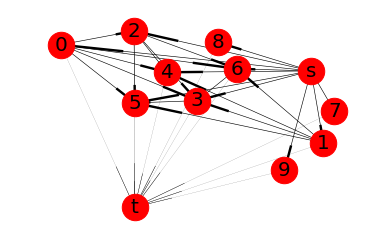

In [94]:
n = 10  # number of intervals
intervals = rand_intervals(n)

print('Intervals:')
for i in intervals:
    print(i)

greedy_s = greedy_interval_schedule(intervals)
print('Greedy Scheduled:')
for i in greedy_s:
    print(i)

print('DP Scheduled:')
g = interval_graph(intervals)
draw_with_weights(g, scale=0.5)

dist, dp_s = longest_path(g)

del dp_s[0]  # remove 's'
del dp_s[-1]  # remove 't'

for i in dp_s:
    print(intervals[i])